In [1]:
# import the necssary libraries 
import numpy as np
import pandas as pd 
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import chi2_contingency, f_oneway,ttest_ind,stats
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
#read the dataset
data = pd.read_csv('emails.csv',encoding = "ISO-8859-1")
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
#describe the data
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [4]:
#info
data.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [5]:
#describe the columns
data.describe().columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [6]:
#shape of the data 
data.shape

(5172, 3002)

In [7]:
#check for null values
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [8]:
# handle useless cols
data.drop(columns=['Email No.'],inplace=True)

In [9]:
# sample data
data.sample(5)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4505,7,8,3,1,1,2,39,0,0,12,...,0,0,0,0,0,0,0,2,0,0
57,2,3,1,2,1,0,17,6,0,4,...,0,0,0,0,0,0,0,0,0,1
118,14,12,12,6,8,3,98,3,5,17,...,0,0,0,0,0,0,0,0,0,0
3171,17,15,2,11,10,9,116,18,0,30,...,0,0,0,0,0,0,0,1,0,1
4921,12,11,7,10,10,7,128,7,1,22,...,0,0,0,0,0,0,0,2,0,1


In [10]:
#statistical summary
data.min()
data.max()
data.mean()
data.var()

the           137.945235
to             90.908132
ect           198.842192
and            36.553750
for            21.907283
                 ...    
military        0.019295
allowing        0.005205
ff              7.729530
dry             0.009621
Prediction      0.205950
Length: 3001, dtype: float64

In [11]:
#statistical summary
for column in data.columns:
    print(f"{column}:")
    print(f"  Min: {data[column].min()}")
    print(f"  Max: {data[column].max()}")
    print(f"  Mean: {data[column].mean()}")
    print(f"  Variance: {data[column].var()}")
    print(f"  Standard Deviation: {data[column].std()}")
    print(f"  Skewness: {skew(data[column])}")
    print(f"  Kurtosis: {kurtosis(data[column])}")

the:
  Min: 0
  Max: 210
  Mean: 6.640564578499613
  Variance: 137.94523487747648
  Standard Deviation: 11.745008934755072
  Skewness: 4.5646316224067025
  Kurtosis: 35.69760681074179
to:
  Min: 0
  Max: 132
  Mean: 6.188128383604021
  Variance: 90.90813209877263
  Standard Deviation: 9.53457561188607
  Skewness: 3.789569767757151
  Kurtosis: 22.021511701569644
ect:
  Min: 1
  Max: 344
  Mean: 5.143851508120649
  Variance: 198.84219193153325
  Standard Deviation: 14.101141511648382
  Skewness: 11.685934626971237
  Kurtosis: 210.85872640226108
and:
  Min: 0
  Max: 89
  Mean: 3.075599381283836
  Variance: 36.55374988240534
  Standard Deviation: 6.0459697222534405
  Skewness: 4.498862797229211
  Kurtosis: 30.909454411230364
for:
  Min: 0
  Max: 47
  Mean: 3.124709976798144
  Variance: 21.907283323334983
  Standard Deviation: 4.680521693501162
  Skewness: 3.6381042728517885
  Kurtosis: 18.21158702233871
of:
  Min: 0
  Max: 77
  Mean: 2.6270301624129933
  Variance: 38.81097296137975
  Stand

Text(0.5, 1.0, 'Number of Spam and not')

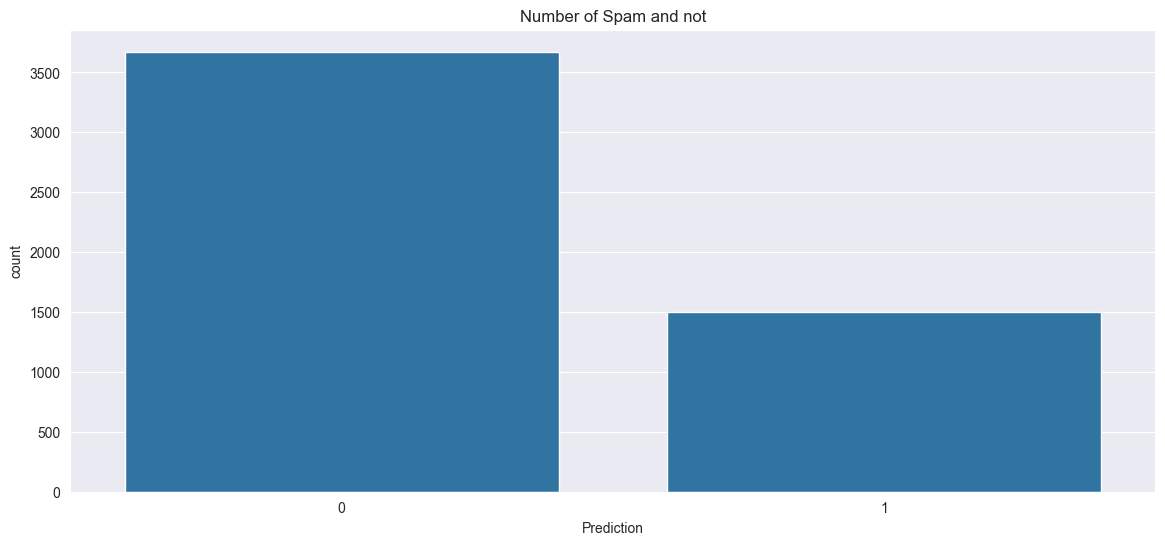

In [12]:
#count plot

plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(x='Prediction',data=data)
plt.title('Number of Spam and not')

Skewness and kurtosis are statistical measures that provide information about the shape of a distribution.

Skewness:

Skewness measures the asymmetry of a distribution.
A skewness value of 0 indicates a perfectly symmetrical distribution.
Positive skewness indicates a distribution that is skewed to the right (tail on the right side is longer or fatter).
Negative skewness indicates a distribution that is skewed to the left (tail on the left side is longer or fatter).
Kurtosis:

Kurtosis measures the "tailedness" of a distribution.
A kurtosis value of 3 in a normal distribution is considered mesokurtic, meaning the distribution has a normal tail shape.
Positive kurtosis (greater than 3) indicates heavy tails and a more peaked distribution (leptokurtic).
Negative kurtosis (less than 3) indicates light tails and a flatter distribution (platykurtic).
In summary:

Skewness tells you about the direction and extent of skew (asymmetry) in a distribution.
Kurtosis tells you about the height and sharpness of the central peak, as well as the tails of the distribution.
These measures are useful in understanding the characteristics of a dataset and can be important in various statistical analyses. They are commonly used in finance, economics, and other fields where understanding the distribution of data is crucial.

In [13]:
#skewness and kurtosis
spam_skewness = skew(data['Prediction'])
spam_kurtosis = kurtosis(data['Prediction'])
print(f"Skewness of 'Prediction' column: {spam_skewness}")
print(f"Kurtosis of 'Prediction' column: {spam_kurtosis}")

Skewness of 'Prediction' column: 0.9254710865424939
Kurtosis of 'Prediction' column: -1.143503267973855


Skewness of 'in' column: 4.6233721758307
Kurtosis of 'in' column: 28.72757277033731


C:\Users\farag\AppData\Local\Temp\ipykernel_13056\2444049525.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['in'])


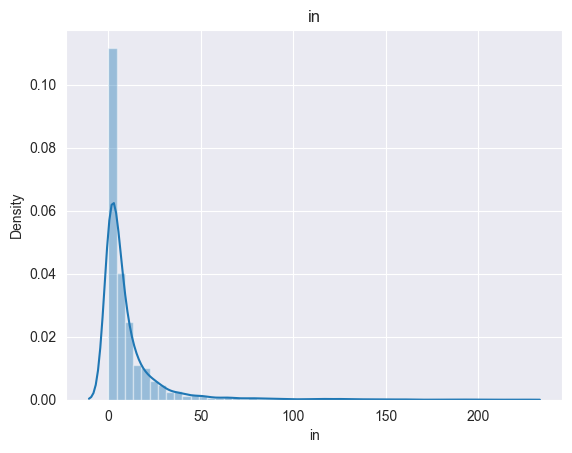

In [14]:
#distribution plot
spam_skewness = skew(data['in'])
spam_kurtosis = kurtosis(data['in'])
print(f"Skewness of 'in' column: {spam_skewness}")
print(f"Kurtosis of 'in' column: {spam_kurtosis}")
sns.distplot(data['in'])
plt.title('in')
plt.show()

Skewness of 'out' column: 8.696531604420398
Kurtosis of 'out' column: 151.97152180285696


C:\Users\farag\AppData\Local\Temp\ipykernel_13056\2829825955.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['out'])


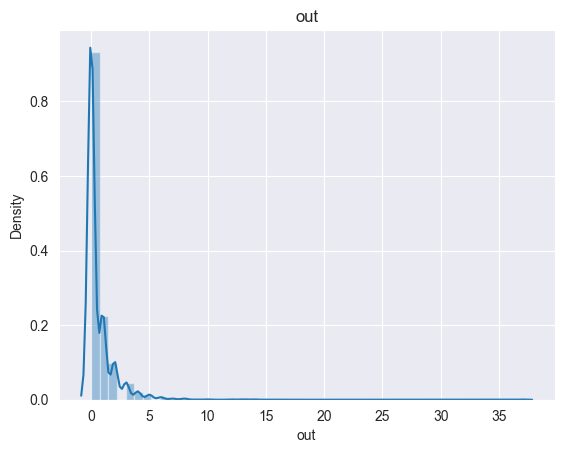

In [80]:

#distribution plot
spam_skewness = skew(data['out'])
spam_kurtosis = kurtosis(data['out'])
print(f"Skewness of 'out' column: {spam_skewness}")
print(f"Kurtosis of 'out' column: {spam_kurtosis}")
sns.distplot(data['out'])
plt.title('out')
plt.show()


A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables. Correlation coefficients quantify the strength and direction of a linear relationship between two variables. The values range from -1 to 1:

1: Perfect positive correlation
0: No correlation
-1: Perfect negative correlation
The correlation matrix is symmetric, with the diagonal containing correlations of each variable with itself, which are always 1.

For example, consider a dataset with three variables A, B, and C. The correlation matrix might look like this:

css
Copy code
    |   A   |   B   |   C   |
-------------------------------
A   |   1   | 0.8  | -0.6 |
B   |  0.8 |   1   |  0.4  |
C   | -0.6 |  0.4 |   1   |
Here, the correlation between A and B is 0.8, indicating a strong positive correlation. The correlation between A and C is -0.6, indicating a moderate negative correlation.

Correlation matrices are often used in statistics and data analysis to examine relationships between variables, identify multicollinearity (high correlations among predictors in regression analysis), and understand the overall structure of the data. It's important to note that correlation does not imply causation; it only measures the strength and direction of a linear relationship between variables.

In [15]:
#correlation
target_column = 'Prediction'
numeric_features = data.select_dtypes(include=[np.number])
cov_matrix = numeric_features.cov()
cov_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,137.945235,95.490182,55.854461,59.733618,43.104784,58.272027,806.854931,23.886931,24.847668,191.515507,...,0.011090,0.177019,0.309180,1.494534,0.115047,0.211220,0.107629,11.163506,0.058778,-0.023564
to,95.490182,90.908132,50.482698,47.585079,34.896859,44.710868,748.533276,20.918400,23.119183,162.106759,...,0.013365,0.192762,0.259070,1.389019,0.085643,0.121370,0.082585,10.779920,0.066762,0.239181
ect,55.854461,50.482698,198.842192,23.262958,24.405573,15.639429,493.970035,9.477642,95.715311,81.130436,...,0.200398,0.088503,0.075824,0.494308,0.005963,-0.015063,0.004444,5.545821,0.003446,-0.772922
and,59.733618,47.585079,23.262958,36.553750,21.260151,30.496390,431.622451,12.436391,9.940142,101.921164,...,0.003294,0.126104,0.192582,0.872688,0.088443,0.070669,0.054421,6.727391,0.025194,0.313789
for,43.104784,34.896859,24.405573,21.260151,21.907283,19.870541,305.000247,10.013165,10.731442,68.829414,...,0.010976,0.039043,0.129016,0.569478,0.060579,0.043659,0.040878,3.917810,0.017503,-0.006588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.211220,0.121370,-0.015063,0.070669,0.043659,0.063176,1.358617,0.003894,0.005255,0.323070,...,-0.000033,-0.000083,0.000704,0.008251,0.000552,0.019295,0.000553,0.019126,0.000148,0.004088
allowing,0.107629,0.082585,0.004444,0.054421,0.040878,0.048894,0.665661,0.025760,-0.000486,0.192109,...,-0.000020,-0.000051,-0.000043,0.000762,0.001917,0.000553,0.005205,0.019298,-0.000028,0.000369
ff,11.163506,10.779920,5.545821,6.727391,3.917810,7.694550,113.087057,2.339731,2.212482,24.032425,...,0.001589,0.040909,0.042292,0.260149,0.030531,0.019126,0.019298,7.729530,0.013550,0.170934
dry,0.058778,0.066762,0.003446,0.025194,0.017503,0.016134,0.805913,0.012223,0.000411,0.147050,...,-0.000035,0.000686,-0.000074,0.001058,-0.000030,0.000148,-0.000028,0.013550,0.009621,-0.000279


In [16]:
#correlation matrix
correlation_matrix = numeric_features.corr()
correlation_matrix

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


A heatmap is a graphical representation of data where values in a matrix are represented as colors. It is a way to visualize the magnitude of a phenomenon as colors in a two-dimensional space. Heatmaps are particularly useful for displaying the relationships between two categorical variables or representing the intensity of a phenomenon across different categories.

In the context of a correlation matrix, a heatmap is often used to visually represent the correlation coefficients between variables. Each cell in the matrix is assigned a color based on the strength and direction of the correlation, making it easy to identify patterns and relationships in the data.

Here's an example using the correlation matrix mentioned earlier:

css
Copy code
    |   A   |   B   |   C   |
-------------------------------
A   |   1   | 0.8  | -0.6 |
B   |  0.8 |   1   |  0.4  |
C   | -0.6 |  0.4 |   1   |
A corresponding heatmap might use a color gradient, where darker shades represent stronger correlations. For instance:

Dark blue or red could represent strong positive or negative correlations, respectively.
Lighter shades or neutral colors (e.g., white or light gray) could represent weaker correlations or no correlation.
The resulting heatmap would provide a visual summary of the correlation structure in the data, making it easier to identify variables that are strongly correlated or inversely correlated. Heatmaps are widely used in data analysis, machine learning, and other fields for visualizing patterns in large datasets.

<Axes: >

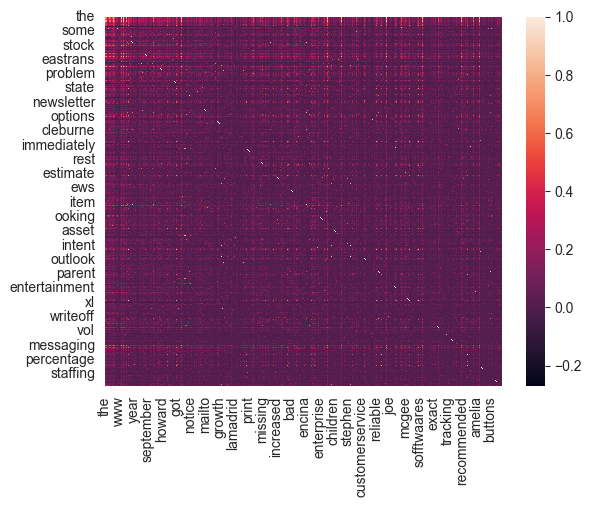

In [17]:
#draw heatmap
sns.heatmap(correlation_matrix)

The chi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. It's based on the difference between the expected and observed frequencies in a contingency table.

Here's a basic overview of how the chi-square test works:

Contingency Table:

A contingency table is a tabular arrangement of data that displays the frequency distribution of two or more categorical variables.
The table shows the number (or percentage) of observations falling into various categories based on the variables being studied.
Hypotheses:

The chi-square test typically involves testing the null hypothesis (H0) that there is no association between the variables against an alternative hypothesis (Ha) that there is a significant association.
Expected Frequencies:

The expected frequencies in each cell of the contingency table are calculated based on the assumption that there is no association between the variables. These are the frequencies that would be expected if there were no relationship.
Chi-Square Statistic:

The chi-square statistic is calculated as the sum of the squared differences between the observed and expected frequencies, divided by the expected frequencies. The formula for the chi-square statistic depends on the specific type of chi-square test being performed.
Degrees of Freedom and Critical Value:

The chi-square test also involves determining the degrees of freedom, which depend on the dimensions of the contingency table.
The chi-square distribution is then consulted to find the critical value corresponding to a chosen level of significance (e.g., 0.05).
Decision Rule:

If the calculated chi-square statistic is greater than the critical value, the null hypothesis is rejected, indicating a significant association between the variables.
If the calculated chi-square statistic is less than the critical value, there is insufficient evidence to reject the null hypothesis.
The chi-square test is commonly used in various fields, such as biology, social sciences, market research, and epidemiology, to assess relationships between categorical variables and identify patterns in the data. There are different variants of the chi-square test, including the Pearson chi-square test and the likelihood ratio chi-square test, each with its specific use case

In [18]:
#chi square test
crosstab = pd.crosstab(data['Prediction'], data['the'])
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)
chi2_stat

282.2970351318756

In [19]:
p_value

5.852586203532801e-22

Both t-tests and ANOVA (Analysis of Variance) tests are statistical methods used to compare means of groups in a dataset, but they are applied in different situations.

T-Test:
Independent T-Test:

Used when comparing means of two independent groups (e.g., comparing the average test scores of students in two different classes).
Assumes that the data in each group are normally distributed and have approximately equal variances.
Paired T-Test:

Used when comparing means of two related groups (e.g., measuring the difference in performance of the same group of individuals before and after an intervention).
Assumes that the differences between pairs of observations are normally distributed.
Formula:

The formula for the t-statistic involves the difference between means and the standard error of the difference. The t-statistic is then compared to a critical value or used to calculate a p-value to determine statistical significance.
ANOVA (Analysis of Variance):
One-Way ANOVA:

Used when comparing means of three or more independent groups (e.g., comparing the average scores of students in multiple classes).
Tests the null hypothesis that all group means are equal.
Two-Way ANOVA:

Extends the one-way ANOVA to consider the influence of two independent variables on a dependent variable.
Useful when there are two categorical independent variables.
Formula:

ANOVA assesses the ratio of the variance between groups to the variance within groups. The F-statistic is calculated and compared to a critical value or used to calculate a p-value.
Key Differences:
Number of Groups:

T-test is typically used for comparing two groups (either independent or paired).
ANOVA is used for comparing three or more groups.
Application:

T-test is suitable for comparing means in simple scenarios with two groups.
ANOVA is suitable for more complex scenarios with multiple groups or multiple independent variables.
Assumptions:

T-test assumes normality of data and equal variances (for independent t-test).
ANOVA assumes normality, homogeneity of variances, and independent observations.
In summary, t-tests are applicable for comparing means between two groups, while ANOVA is suitable for comparing means among three or more groups. Both tests help researchers assess whether observed differences in means are statistically significant.

In [20]:
#t-test
group1 = data[data['Prediction'] == 0]['the']
group2 = data[data['Prediction'] == 1]['in']
z_stat, p_value = ttest_ind(group1, group2)
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -15.943802395443837
P-value: 6.642657915267651e-56


In [21]:
#anova test
groups = [group for name, group in data.groupby('Prediction')['the']]
anova_stat, p_value = f_oneway(*groups)
anova_stat

0.1010441357992621

In [22]:
#LDA and PCA components 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = data.drop('Prediction', axis=1)  
y = data['Prediction']  
lda = LinearDiscriminantAnalysis(n_components=1) 
X_lda = lda.fit_transform(X, y)
data_lda = pd.DataFrame(X_lda, columns=['LDA_Component'])
data_lda['Prediction'] = y

In [23]:
#PCA components 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop('Prediction', axis=1)  
y = data['Prediction']  

X_standardized = StandardScaler().fit_transform(X)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_standardized)

data_pca = pd.DataFrame(X_pca, columns=['PCA_Component1', 'PCA_Component2'])
data_pca['Prediction'] = y

In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [25]:
X = data.drop("Prediction",axis=1)     
y= data["Prediction"] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)


In [27]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
print(f"Naive Bayesian Accuracy: {accuracy_score(y_test, nb_predictions)}")

Naive Bayesian Accuracy: 0.9478260869565217


In [28]:
#cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=cv)
avg_accuracy_nb = np.mean(nb_cv_scores)
print(f"Naive Bayesian Average Accuracy: {avg_accuracy_nb}")

Naive Bayesian Average Accuracy: 0.9509323028932934


In [29]:
#make predictions
predictions= nb_classifier.predict(X_test)
predictions[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

A confusion matrix is a table that is used in classification to evaluate the performance of a machine learning model. It summarizes the results of a classification problem by comparing the predicted classes to the true classes of a set of observations. The four main components of a confusion matrix are:

1. **True Positive (TP):** 
   - Instances where the model correctly predicts the positive class.

2. **True Negative (TN):**
   - Instances where the model correctly predicts the negative class.

3. **False Positive (FP):**
   - Instances where the model incorrectly predicts the positive class (Type I error).

4. **False Negative (FN):**
   - Instances where the model incorrectly predicts the negative class (Type II error).

The confusion matrix is typically organized like this:

```
                    Predicted
                |   Positive   |   Negative   |
-------------------------------------------------
Actual  Positive |   TP         |   FN         |
-------------------------------------------------
Actual  Negative |   FP         |   TN         |
```

Using these components, various performance metrics can be calculated:

- **Accuracy:** The proportion of correctly classified instances out of the total instances.

  \[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]

- **Precision (Positive Predictive Value):** The proportion of true positive predictions out of all positive predictions.

  \[ Precision = \frac{TP}{TP + FP} \]

- **Recall (Sensitivity or True Positive Rate):** The proportion of true positive predictions out of all actual positive instances.

  \[ Recall = \frac{TP}{TP + FN} \]

- **F1 Score:** The harmonic mean of precision and recall.

  \[ F1 \text{ Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \]

Confusion matrices are valuable tools for understanding the performance of a classification model, especially in situations where there may be imbalances in the class distribution. They provide a more detailed and nuanced evaluation than accuracy alone.

In [30]:
#confusion matrix
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)
print('Naive Bayesian Confusion Matrix:\n', conf_matrix_nb)
print('Naive Bayesian Classification Report:\n', classification_report(y_test, nb_predictions))

Naive Bayesian Confusion Matrix:
 [[697  42]
 [ 12 284]]
Naive Bayesian Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.87      0.96      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



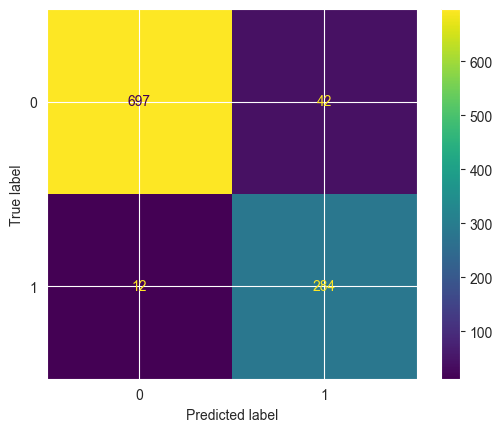

In [31]:
#draw confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions)
plt.show()

A Bayesian Belief Network (BBN), also known as a Bayesian Network or Bayes Network, is a probabilistic graphical model that represents a set of random variables and their conditional dependencies through a directed acyclic graph (DAG). This type of model is particularly useful for reasoning under uncertainty and making probabilistic inferences.

Key components of a Bayesian Belief Network:

1. **Nodes:**
   - Nodes in a BBN represent random variables or events. Each node corresponds to a variable that can take on different states.

2. **Edges:**
   - Directed edges between nodes represent conditional dependencies. An arrow from node A to node B indicates that the state of A has a direct influence on the probability distribution of B.

3. **Conditional Probability Tables (CPTs):**
   - Each node in a BBN is associated with a conditional probability table. These tables specify the probability distribution of the node given the states of its parent nodes in the graph.

4. **Bayesian Inference:**
   - BBNs are particularly powerful for performing Bayesian inference. Given evidence (observations) about certain nodes, the network can be used to calculate the posterior probability distributions of other nodes.

5. **DAG Structure:**
   - The acyclic nature of the graph ensures that there are no cycles, making it a directed acyclic graph (DAG). This structure allows efficient and accurate computation of probabilities.

Applications of Bayesian Belief Networks:

1. **Medical Diagnosis:**
   - BBNs are used in medical fields for diagnosing diseases. Nodes might represent symptoms, test results, and diseases, with edges indicating dependencies.

2. **Risk Assessment:**
   - BBNs are employed in risk assessment and decision analysis to model and analyze uncertainties in various scenarios, such as financial risk or project management.

3. **Natural Language Processing:**
   - BBNs are used in natural language processing for tasks like speech recognition and language understanding.

4. **Financial Modeling:**
   - BBNs can model financial systems, helping to make predictions and decisions based on uncertain information.

Building a Bayesian Belief Network involves specifying the structure of the graph and determining the conditional probabilities. The ability to handle uncertainty and incorporate new evidence makes BBNs a valuable tool in various fields for decision-making and probabilistic reasoning.

In [68]:
#Bayesian Belief Network
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
feature_names = X.columns.tolist()
edge_list = [(feature, 'Prediction') for feature in feature_names]

c:\Users\farag\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [69]:
bbn_model = BayesianNetwork(edge_list)
bbn_model.fit(data, estimator=MaximumLikelihoodEstimator)
bbn_predictions_binary = (bbn_predictions > 0.5).astype(int)
bbn_accuracy = accuracy_score(y_test, bbn_predictions_binary)
print(f"Bayesian Belief Network Accuracy: {bbn_accuracy}")
conf_matrix_bbn = confusion_matrix(y_test, bbn_predictions_binary)
print('Bayesian Belief Network Confusion Matrix:\n', conf_matrix_bbn)
print('Bayesian Belief Network Classification Report:\n', classification_report(y_test, bbn_predictions_binary))

ValueError: Product space too large to allocate arrays!

In [34]:
#K-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier  = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [35]:
#K-NN Accuracy
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))

Accuracy score:  0.9478260869565217


In [36]:
#K-NN COnfusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
print('K-NN Confusion Matrix:\n', conf_matrix_knn)
print('K-NN Classification Report:\n', classification_report(y_test, knn_predictions))


K-NN Confusion Matrix:
 [[652  87]
 [ 49 247]]
K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       739
           1       0.74      0.83      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.88      0.87      0.87      1035



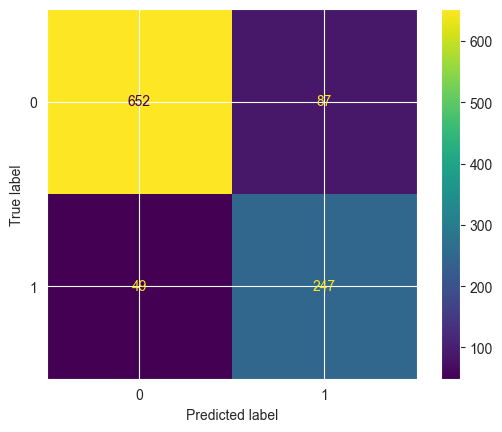

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

In [38]:
#K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier  = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

In [39]:
#K-neighbors cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
knn_cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv)
# Average accuracy
avg_accuracy_knn = np.mean(knn_cv_scores)
print(f"K-Nearest Neighbors Average Accuracy: {avg_accuracy_knn}")

K-Nearest Neighbors Average Accuracy: 0.8687471157609427


In [40]:
#K-Neighbors COnfusion Matrix
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)
print('K-NN Confusion Matrix:\n', conf_matrix_knn)
print('K-NN Classification Report:\n', classification_report(y_test, knn_predictions))

K-NN Confusion Matrix:
 [[668  71]
 [ 62 234]]
K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       739
           1       0.77      0.79      0.78       296

    accuracy                           0.87      1035
   macro avg       0.84      0.85      0.84      1035
weighted avg       0.87      0.87      0.87      1035



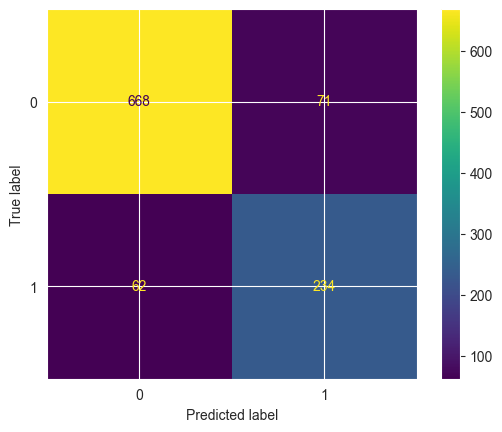

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

In [42]:
#Decision Tree Classifier
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)
dt_entropy_predictions = dt_entropy.predict(X_test)
print(f"Decision Tree (Entropy) Accuracy: {accuracy_score(y_test, dt_entropy_predictions)}")

Decision Tree (Entropy) Accuracy: 0.9265700483091788


In [43]:

dt= DecisionTreeClassifier( criterion='gini', ccp_alpha = 0.015) 
dt.fit(X_train, y_train)    
predictions = dt.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, dt_entropy_predictions)))

Accuracy score:  0.9265700483091788


In [44]:
conf_matrix_dt = confusion_matrix(y_test, dt_entropy_predictions)
print('Decision Tree (Entropy) Confusion Matrix:\n', conf_matrix_dt)
print('Decision Tree (Entropy) Classification Report:\n', classification_report(y_test, dt_entropy_predictions))

Decision Tree (Entropy) Confusion Matrix:
 [[700  39]
 [ 37 259]]
Decision Tree (Entropy) Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       739
           1       0.87      0.88      0.87       296

    accuracy                           0.93      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.93      0.93      0.93      1035



In [45]:
# Standardize the data for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Neural Network (Multi-layer Perceptron)
nn_classifier = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
nn_classifier.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)

In [47]:
nn_predictions = nn_classifier.predict(X_test_scaled)
print(f"Neural Network Accuracy: {accuracy_score(y_test, nn_predictions)}")

Neural Network Accuracy: 0.9690821256038648


In [48]:
conf_matrix_nn = confusion_matrix(y_test, nn_predictions)
print('Neural Network Confusion Matrix:\n', conf_matrix_nn)
print('Neural Network Classification Report:\n', classification_report(y_test, nn_predictions))

Neural Network Confusion Matrix:
 [[711  28]
 [  4 292]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       739
           1       0.91      0.99      0.95       296

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



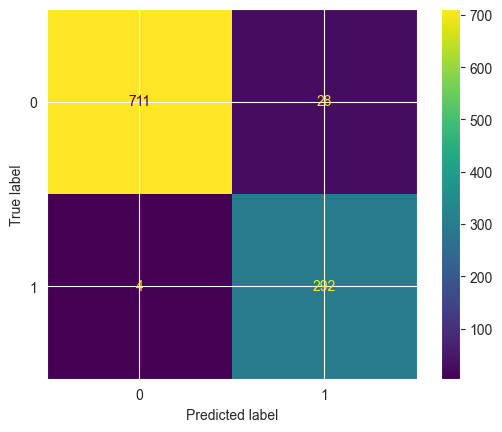

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nn_predictions)
plt.show()

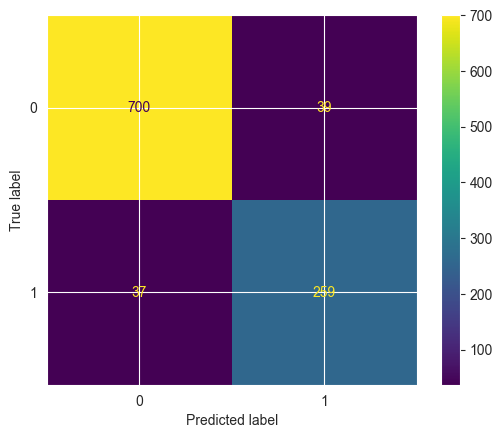

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, dt_entropy_predictions)
plt.show()

In [51]:
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

confusion_matrix: 
 [[708  31]
 [127 169]]
Precision score:  0.845
Recall score:  0.5709459459459459
F1 score:  0.6814516129032259


In [52]:
#ANOTHER WAY
conf_matrix = confusion_matrix(y_test, predictions)
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]
total_instances = conf_matrix.sum()
error_rate = (FP + FN) / total_instances
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Error Rate: {error_rate:.2f}")


Accuracy: 0.85
Precision: 0.84
Recall: 0.57
F1-Score: 0.68
Error Rate: 0.15


In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

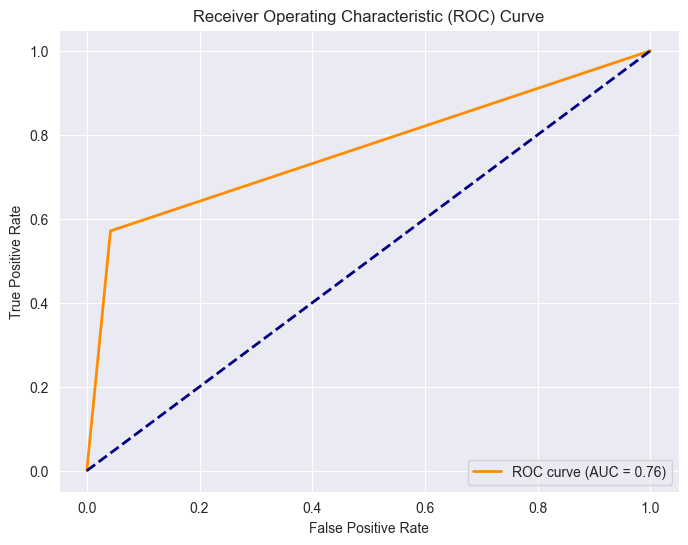

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [55]:
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions,)))

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       739
           1       0.84      0.57      0.68       296

    accuracy                           0.85      1035
   macro avg       0.85      0.76      0.79      1035
weighted avg       0.85      0.85      0.84      1035



In [56]:
pca_classifier = KNeighborsClassifier(n_neighbors=3)
pca_classifier.fit(X_train, y_train)
pca_predictions = pca_classifier.predict(X_test)
print(f"PCA Accuracy: {accuracy_score(y_test, pca_predictions)}")

PCA Accuracy: 0.8685990338164251


In [57]:
conf_matrix_pca = confusion_matrix(y_test, pca_predictions)
print('PCA Confusion Matrix:\n', conf_matrix_pca)
print('PCA Classification Report:\n', classification_report(y_test, pca_predictions))

PCA Confusion Matrix:
 [[652  87]
 [ 49 247]]
PCA Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       739
           1       0.74      0.83      0.78       296

    accuracy                           0.87      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.88      0.87      0.87      1035



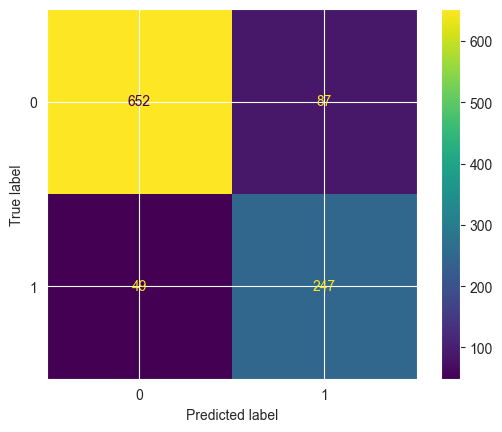

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, pca_predictions)
plt.show()

In [59]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_predictions = lda_classifier.predict(X_test)
print(f"LDA Accuracy: {accuracy_score(y_test, lda_predictions)}")

LDA Accuracy: 0.7613526570048309


In [60]:
conf_matrix_lda = confusion_matrix(y_test, lda_predictions)
print('LDA Confusion Matrix:\n', conf_matrix_lda)
print('LDA Classification Report:\n', classification_report(y_test, lda_predictions))

LDA Confusion Matrix:
 [[606 133]
 [114 182]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       739
           1       0.58      0.61      0.60       296

    accuracy                           0.76      1035
   macro avg       0.71      0.72      0.71      1035
weighted avg       0.77      0.76      0.76      1035



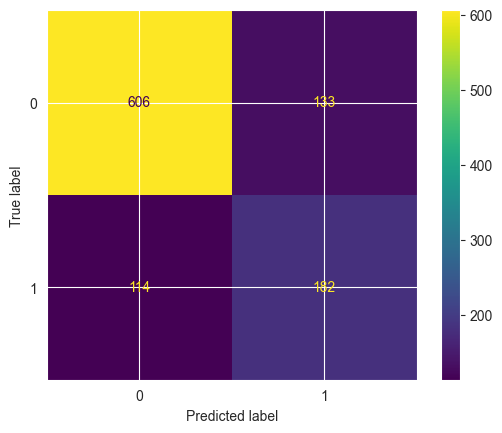

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

In [62]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_cv_predictions = cross_val_predict(knn_classifier, X_train, y_train, cv=cv)
avg_accuracy_knn = np.mean(cross_val_predict(knn_classifier, X_train, y_train, cv=cv) == y_train)
print(f"K-NN Average Accuracy: {avg_accuracy_knn}")

K-NN Average Accuracy: 0.8718878414309886


In [63]:
svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [64]:
nb_classifier_svd = GaussianNB()
nb_classifier_svd.fit(X_train_svd, y_train)

GaussianNB()

In [65]:
nb_predictions_svd = nb_classifier_svd.predict(X_test_svd)
print(f"Naive Bayesian with SVD Accuracy: {accuracy_score(y_test, nb_predictions_svd)}")

Naive Bayesian with SVD Accuracy: 0.6801932367149759


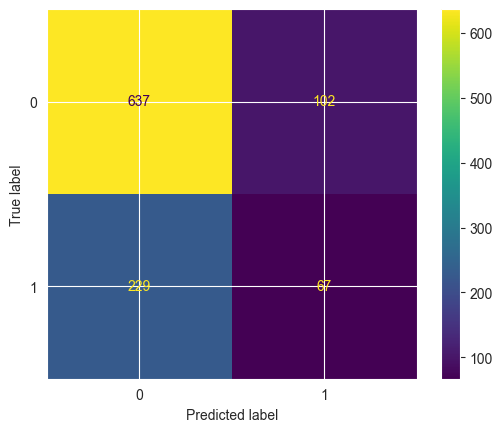

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, nb_predictions_svd)
plt.show()

In [70]:
if accuracy > 0.9:
    print("The model has high accuracy.")
    if precision == 1.0 and recall == 1.0:
        print("The model has high precision and recall, indicating potential overfitting.")
    elif precision < 0.8 or recall < 0.8:
        print("The model may have issues with generalization, potential overfitting.")
    else:
        print("The model has balanced precision and recall.")
elif accuracy > 0.8:
    print("The model has moderate accuracy.")
    if precision < 0.7 or recall < 0.7:
        print("The model may be underfitting or have issues with generalization.")
    else:
        print("The model has balanced precision and recall.")
else:
    print("The model has low accuracy, indicating potential underfitting.")

The model has moderate accuracy.
The model may be underfitting or have issues with generalization.


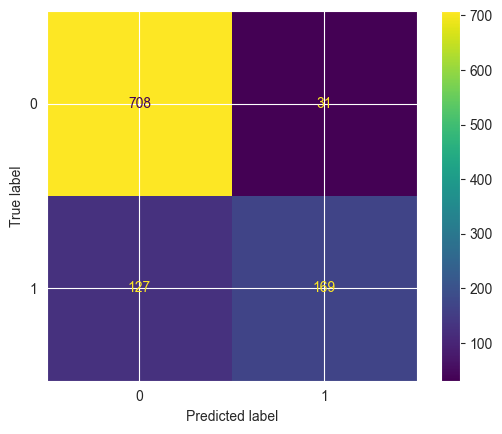

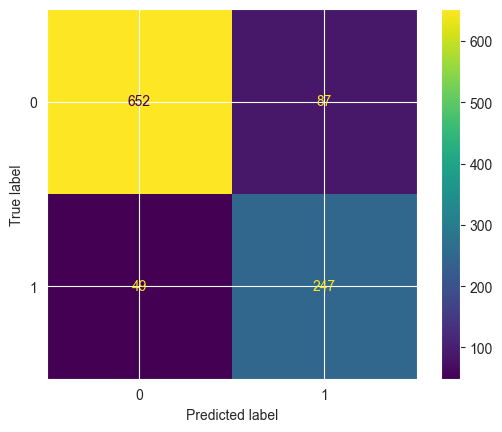

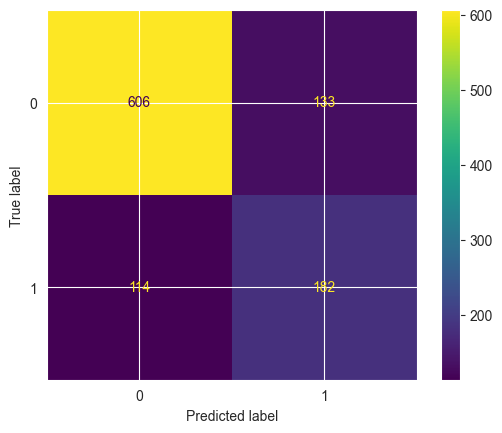

In [71]:
#draw all confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
ConfusionMatrixDisplay.from_predictions(y_test, pca_predictions)
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

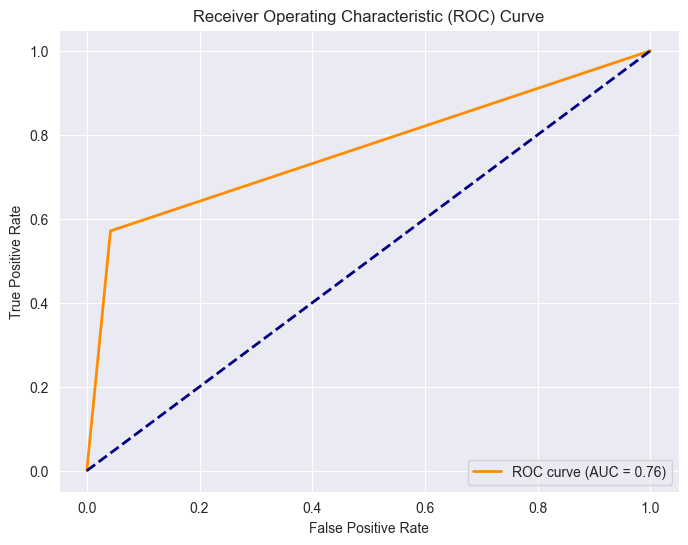

In [73]:
#draw all the accuracies for all models in one figure
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

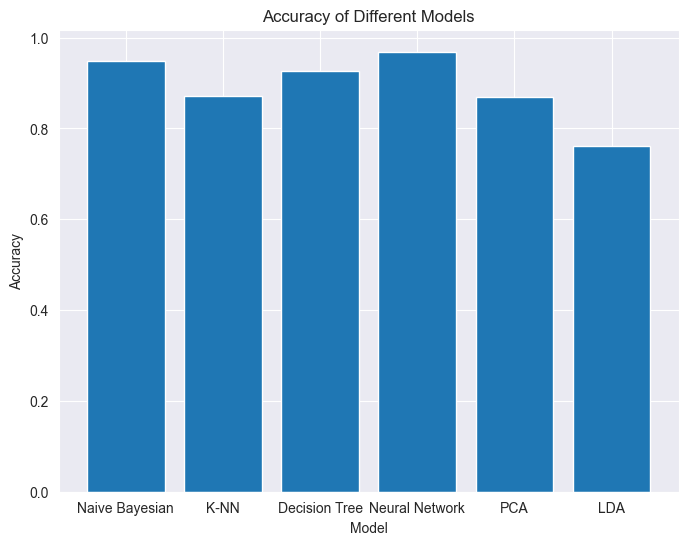

In [77]:
#draw all the accuracies for all models in one figure
plt.figure(figsize=(8, 6))
plt.bar(['Naive Bayesian', 'K-NN', 'Decision Tree', 'Neural Network', 'PCA', 'LDA'], [accuracy_score(y_test, nb_predictions), accuracy_score(y_test, knn_predictions), accuracy_score(y_test, dt_entropy_predictions), accuracy_score(y_test, nn_predictions), accuracy_score(y_test, pca_predictions), accuracy_score(y_test, lda_predictions)])
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()